<a href="https://colab.research.google.com/github/mmmhdp/cv_labs/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание на лаб.1
1) Нарисовать на картинке сетку с задаваемым размером ячейки по x и y
реализовать функцию в 2х вариантах с исбользованием cv2.line и без

2) есть картинка на которой изображены фигуры, прямоугольник и прямая. У прямоугольника найти координаты углов и
ширину линий.
Для прямой найти только координаты прямой

In [365]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

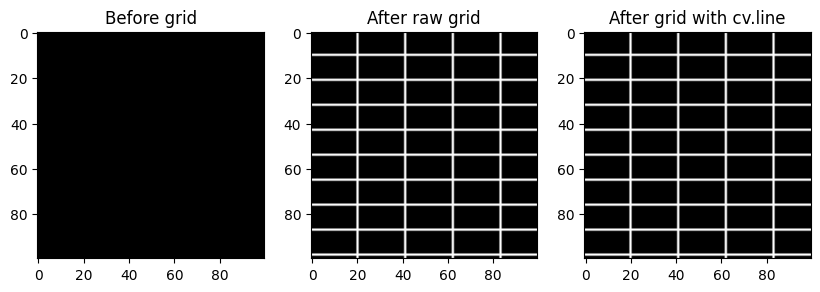

In [374]:
##with cv line and without it
def grid2(x_axis_step: int , y_axis_step: int , im_to_grid, is_raw=True):
    im = im_to_grid.copy()
    h = im.shape[0] - 1
    w = im.shape[1] - 1

    x_step = x_axis_step
    y_step = y_axis_step

    x_range = w//(x_step+1) + 1
    y_range = h//(y_step+1) + 1

    if is_raw:
        x_0 = x_step
        for _ in range(x_range):
            if x_0 > w:
                continue
            im[:,x_0,:] = 255
            x_0 += x_step + 1

        y_0 = y_step
        for _ in range(y_range):
            if y_0 > h:
                continue
            im[y_0,:,:] = 255
            y_0 += y_step + 1
    else:
        x_0 = x_step
        for _ in range(x_range):
            cv2.line(
                im,
                (x_0,0),
                (x_0,h),
                (255,255,255))
            x_0 += x_step + 1

        y_0 = y_step
        for _ in range(y_range):
            cv2.line(
                im,
                (0,y_0),
                (w,y_0),
                (255,255,255))
            y_0 += y_step + 1

    return im


row,col = 3,3
fig = plt.figure(figsize=(10, 10))

x_size = 100
y_size = 100
test_im = np.zeros(shape=(y_size, x_size, 3), dtype=np.uint8)

fig.add_subplot(row,col,1)
plt.imshow(test_im)
plt.axis("on")
plt.title("Before grid")

x_step, y_step = 20,10

fig.add_subplot(row,col,2)
plt.imshow(grid2(x_step,y_step,test_im))
plt.axis("on")
plt.title("After raw grid")

fig.add_subplot(row,col,3)
plt.imshow(grid2(x_step,y_step,test_im, False))
plt.axis("on")
plt.title("After grid with cv.line")

plt.show()

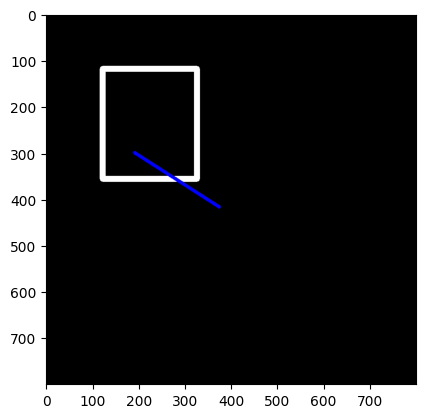

In [367]:
import numpy as np
import random
test_img = np.zeros((800,800,3), np.uint8)
x1 = random.randint(50, 399)
x2 = random.randint(50, 399) + x1
y1 = random.randint(50, 399)
y2 = random.randint(50, 399) + y1

cv2.rectangle(test_img, (x1,y1), (x2,y2), (255,255,255), random.randint(5,15))

x1 = random.randint(50, 399)
x2 = random.randint(50, 399) + x1
y1 = random.randint(50, 399)
y2 = random.randint(50, 399) + y1

cv2.line(test_img, (x1,y1), (x2,y2), (0,0,255), random.randint(5,15))

plt.imshow(test_img)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
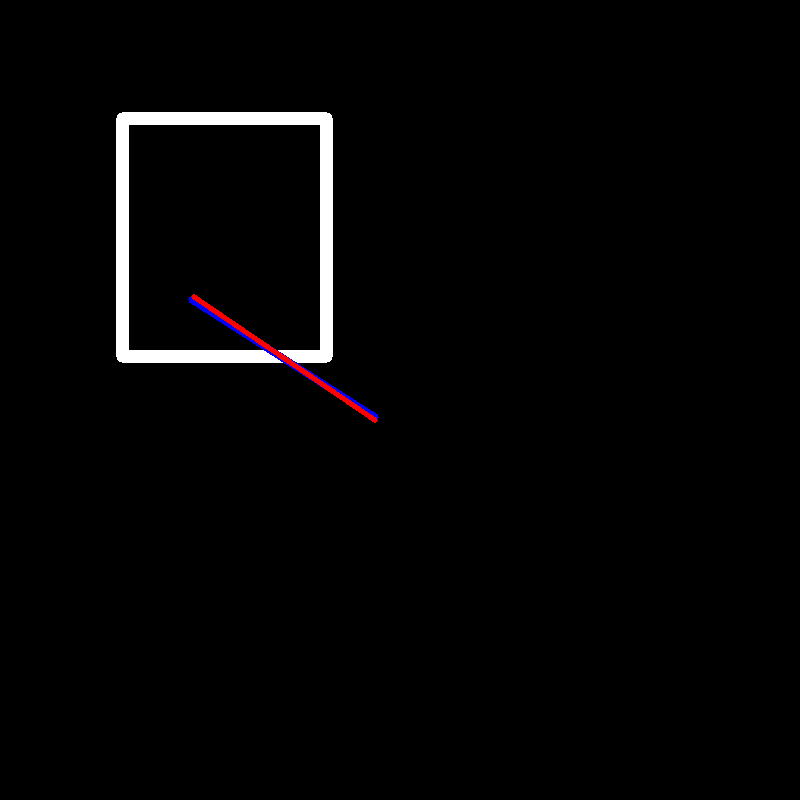

In [368]:
def find_line(img, line_to_find_RGB):
    x1 = img.shape[0] + 1
    y1 = -1
    x2 = -1
    y2 = -1

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):

            if np.array_equal(img[i, j], line_to_find_RGB):
                x1 = min(x1, i)

                y1 = j if x1 == i else y1

                x2 = max(x2, i)

                y2 = j if x2 == i else y2

    return [(y1, x1), (y2, x2)]

res = find_line(test_img, (0,0,255))
res
cv2.line(test_img.copy(),res[0], res[1], (255,0,0), 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
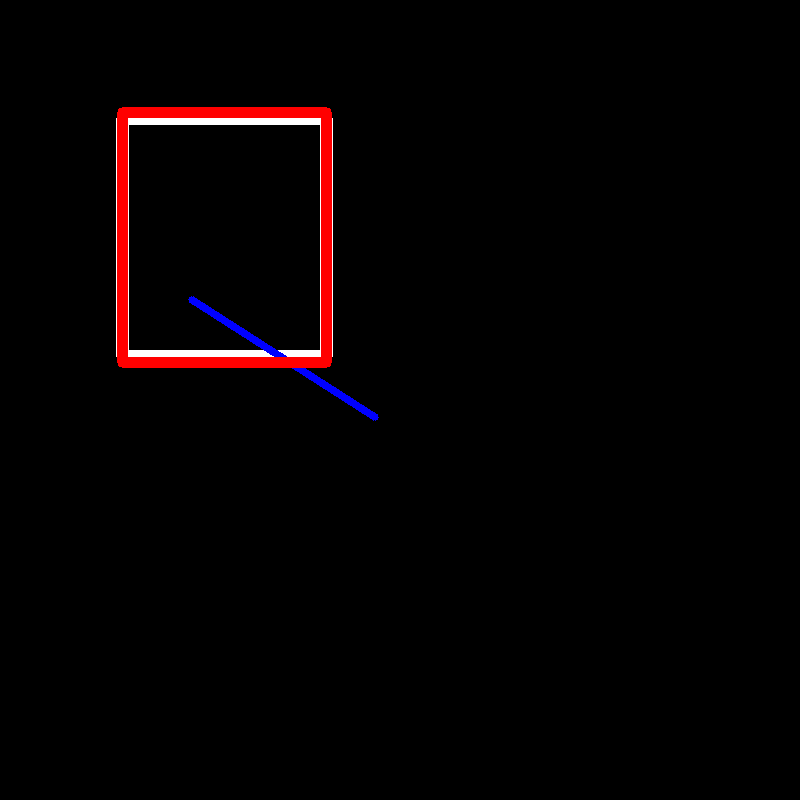

In [375]:
def find_rect(img, rect_to_find_RGB=(255, 255, 255)):
    x1 = img.shape[0] + 1
    y1 = -1
    x2 = -1
    y2 = -1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):

            if np.array_equal(img[i, j], rect_to_find_RGB):
                x1 = min(x1, i)

                y1 = j if  x1 == i and y1 == -1 else y1

                x2 = max(x2, i)

                y2 = j if x2 == i else y2

    return [(y1, x1), (y2, x2)]

res = find_rect(test_img, (255,255,255))
cv2.rectangle(test_img.copy(),res[0], res[1], (255,0,0),10)